In [59]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

In [60]:
Collision_data = pd.read_csv('NYC_accidents_heat_map.csv')
Collision_data.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/22/2017,0:00,BRONX,10453,40.861862,-73.912820,"(40.861862, -73.91282)",WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,NaN,...,Unspecified,NaN,NaN,NaN,3774361,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,10/22/2017,0:00,BROOKLYN,11211,40.714073,-73.950615,"(40.714073, -73.950615)",NaN,NaN,545 METROPOLITAN AVENUE,...,Other Vehicular,NaN,NaN,NaN,3774004,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2,10/22/2017,0:00,MANHATTAN,10011,40.739136,-73.999260,"(40.739136, -73.99926)",NaN,NaN,77 7 AVENUE,...,Unspecified,NaN,NaN,NaN,3774254,TAXI,BU,NaN,NaN,NaN
3,10/22/2017,0:00,MANHATTAN,10025,40.794235,-73.962814,"(40.794235, -73.962814)",CENTRAL PARK WEST,WEST 100 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3774917,TAXI,TAXI,NaN,NaN,NaN
4,10/22/2017,0:00,QUEENS,11428,40.720375,-73.732260,"(40.720375, -73.73226)",JAMAICA AVENUE,222 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3774091,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [61]:
Collision_data['la'] = Collision_data['LATITUDE'].map(lambda x : round(float(x),2))
Collision_data['lo'] = Collision_data['LONGITUDE'].map(lambda x : round(float(x),2))

In [62]:
data1 = Collision_data.loc[:,['CONTRIBUTING FACTOR VEHICLE 1','la','lo']]
data1 = data1.dropna()

In [63]:
Dummy1 = pd.get_dummies(data1['CONTRIBUTING FACTOR VEHICLE 1'])


In [64]:
a1 = pd.concat([data1.loc[:,['la','lo']], Dummy1], axis=1)

In [65]:
a1.head()

,la,lo,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-held),Cell Phone (hands-free),...,Tire Failure/Inadequate,Tow Hitch Defective,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Unspecified,View Obstructed/Limited,Windshield Inadequate
0,40.86,-73.91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.71,-73.95,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40.74,-74.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40.79,-73.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40.72,-73.73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#事故が少ない要因は減らす

b1 = a1
for i in range(len(a1.columns)-2):
    if a1.iloc[:, len(a1.columns) - i -1].sum()<1000 :
        b1 = b1.drop(a1.columns[len(a1.columns) - i -1],axis=1)

In [67]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924326 entries, 0 to 1139132
Data columns (total 34 columns):
la                                                       924326 non-null float64
lo                                                       924326 non-null float64
Aggressive Driving/Road Rage                             924326 non-null uint8
Alcohol Involvement                                      924326 non-null uint8
Backing Unsafely                                         924326 non-null uint8
Brakes Defective                                         924326 non-null uint8
Driver Inattention/Distraction                           924326 non-null uint8
Driver Inexperience                                      924326 non-null uint8
Failure to Keep Right                                    924326 non-null uint8
Failure to Yield Right-of-Way                            924326 non-null uint8
Fatigued/Drowsy                                          924326 non-null uint8
Fell Asleep    

In [68]:
factor_data = b1.groupby(['la','lo']).sum()

In [69]:
factor_data = factor_data.drop(0.00)
factor_data = factor_data.drop('Unspecified', axis = 1)
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 930 entries, (40.5, -74.25) to (41.13, -73.71)
Data columns (total 31 columns):
Aggressive Driving/Road Rage                             930 non-null float64
Alcohol Involvement                                      930 non-null float64
Backing Unsafely                                         930 non-null float64
Brakes Defective                                         930 non-null float64
Driver Inattention/Distraction                           930 non-null float64
Driver Inexperience                                      930 non-null float64
Failure to Keep Right                                    930 non-null float64
Failure to Yield Right-of-Way                            930 non-null float64
Fatigued/Drowsy                                          930 non-null float64
Fell Asleep                                              930 non-null float64
Following Too Closely                                    930 non-null float64
Glare       

In [70]:
#事故が少ない場所は減らす
F = factor_data
for i in range(len(factor_data.index)-2):
    if factor_data.iloc[len(factor_data.index) - i -1, :].sum()<500:
        F = F.drop(factor_data.index[len(factor_data.index) - i -1],axis=0)

In [71]:
x1=[]
for i in range(len(F.index)):
    x1.append(F.iloc[i,:].sum())
x1=pd.DataFrame(x1)

In [72]:
y1=[]
for i in range(len(x1.index)):
    y1.append(x1.iloc[i]/x1.max())
y1=pd.DataFrame(y1)

In [73]:
#事故数を割合に変換
G=F
for i in range(len(F.index)):
    for j in range(len(F.columns)):
        G.iloc[i,j] = F.iloc[i,j] / F.iloc[i,:].sum()
        

In [74]:
G.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 341 entries, (40.5, -74.25) to (40.89, -73.86)
Data columns (total 31 columns):
Aggressive Driving/Road Rage                             341 non-null float64
Alcohol Involvement                                      341 non-null float64
Backing Unsafely                                         341 non-null float64
Brakes Defective                                         341 non-null float64
Driver Inattention/Distraction                           341 non-null float64
Driver Inexperience                                      341 non-null float64
Failure to Keep Right                                    341 non-null float64
Failure to Yield Right-of-Way                            341 non-null float64
Fatigued/Drowsy                                          341 non-null float64
Fell Asleep                                              341 non-null float64
Following Too Closely                                    341 non-null float64
Glare       

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(G)
pca.explained_variance_ratio_

array([ 0.313,  0.217,  0.104])

In [76]:
pca.components_

array([[ -5.433e-04,   2.279e-02,   4.756e-02,   4.602e-04,   1.719e-01,
          3.411e-02,   6.239e-03,   2.292e-01,  -8.109e-02,   9.166e-03,
         -8.193e-02,   1.230e-02,  -2.821e-03,  -8.556e-03,  -3.458e-03,
          6.941e-03,  -1.085e-01,  -1.675e-02,   5.334e-03,   2.710e-02,
         -1.589e-02,   6.068e-02,   1.103e-02,   1.597e-01,   8.400e-02,
          2.134e-02,   3.513e-01,  -3.125e-01,  -7.850e-01,  -7.440e-02,
         -8.703e-02],
       [ -2.152e-03,   2.212e-03,  -3.986e-02,  -3.718e-04,  -1.644e-02,
         -9.917e-03,   5.350e-03,   2.052e-02,   1.685e-01,   6.202e-03,
          1.418e-01,   6.367e-03,  -1.143e-02,  -6.988e-02,   7.671e-03,
         -1.984e-03,  -1.214e-01,   5.334e-02,  -7.641e-02,  -6.533e-02,
         -5.558e-02,   5.438e-02,  -2.738e-02,  -1.466e-02,  -1.435e-01,
          1.589e-02,   9.251e-02,   2.669e-02,   3.128e-02,   5.486e-01,
         -7.597e-01],
       [  8.188e-03,   1.038e-02,  -4.673e-02,   4.011e-03,   7.004e-02,
       

[ 0.313  0.217  0.104]


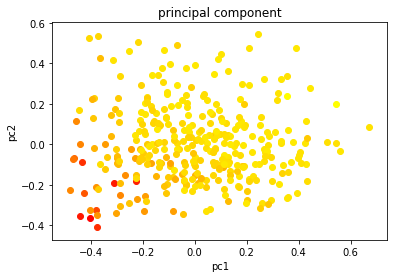

In [77]:
# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(G)
# 主成分をプロットする
for i in range(len(y1.index)):
    plt.scatter(transformed[i, 0], transformed[i, 1], c=(1,1-float(y1.iloc[i]),0))
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の次元ごとの寄与率を出力する
print(pca.explained_variance_ratio_)

# グラフを表示する


plt.show()

In [78]:
data2 = Collision_data.loc[:,['VEHICLE TYPE CODE 1','la','lo']]
data2 = data2.dropna()
Dummy2 = pd.get_dummies(data2['VEHICLE TYPE CODE 1'])
a2 = pd.concat([data2.loc[:,['la','lo']], Dummy2], axis=1)


In [79]:
#事故が少ない車種は減らす
b2 = a2
for i in range(len(a2.columns)-2):
    if a2.iloc[:, len(a2.columns) - i -1].sum()<500 :
        b2 = b2.drop(a2.columns[len(a2.columns) - i -1],axis=1)

In [80]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921578 entries, 0 to 1139132
Data columns (total 17 columns):
la                                921578 non-null float64
lo                                921578 non-null float64
AMBULANCE                         921578 non-null uint8
BICYCLE                           921578 non-null uint8
BUS                               921578 non-null uint8
FIRE TRUCK                        921578 non-null uint8
LARGE COM VEH(6 OR MORE TIRES)    921578 non-null uint8
LIVERY VEHICLE                    921578 non-null uint8
MOTORCYCLE                        921578 non-null uint8
OTHER                             921578 non-null uint8
PASSENGER VEHICLE                 921578 non-null uint8
PICK-UP TRUCK                     921578 non-null uint8
SMALL COM VEH(4 TIRES)            921578 non-null uint8
SPORT UTILITY / STATION WAGON     921578 non-null uint8
TAXI                              921578 non-null uint8
UNKNOWN                           921578 non

In [81]:
vehicletype_data = b2.groupby(['la','lo']).sum()
vehicletype_data = vehicletype_data.drop(0.00)
vehicletype_data = vehicletype_data.drop('UNKNOWN', axis = 1)
vehicletype_data = vehicletype_data.drop('OTHER', axis = 1)

In [82]:
V = vehicletype_data

for i in range(len(vehicletype_data.index)-2):
    if vehicletype_data.iloc[len(vehicletype_data.index) - i -1, :].sum()<150:   ##検討の余地あり
        V = V.drop(vehicletype_data.index[len(vehicletype_data.index) - i -1],axis=0)

In [83]:
V.head()

AMBULANCE  BICYCLE  BUS  FIRE TRUCK  \
la    lo                                            
40.50 -74.25        0.0      0.0  0.0         0.0   
      -74.24        0.0      0.0  0.0         0.0   
40.51 -74.25        0.0      0.0  2.0         1.0   
      -74.24        0.0      0.0  3.0         0.0   
40.52 -74.24        0.0      0.0  0.0         0.0   

              LARGE COM VEH(6 OR MORE TIRES)  LIVERY VEHICLE  MOTORCYCLE  \
la    lo                                                                   
40.50 -74.25                             0.0             0.0         0.0   
      -74.24                             0.0             0.0         1.0   
40.51 -74.25                             1.0             0.0         0.0   
      -74.24                             0.0             0.0         1.0   
40.52 -74.24                             0.0             0.0         2.0   

              PASSENGER VEHICLE  PICK-UP TRUCK  SMALL COM VEH(4 TIRES)   \
la    lo                                                                  
40.50 -74.25               18.0            0.0                      0.0   
      -74.24               44.0            2.0                      0.0   
40.51 -74.25              134.0           10.0                      4.0   
      -74.24              167.0            8.0                      0.0   
40.52 -74.24              153.0            8.0                      1.0   

              SPORT UTILITY / STATION WAGON  TAXI  VAN  
la    lo                                                
40.50 -74.25                           12.0   0.0  0.0  
      -74.24                           14.0   0.0  1.0  
40.51 -74.25                           44.0   0.0  2.0  
      -74.24                           69.0   0.0  5.0  
40.52 -74.24                           69.0   0.0  3.0

In [84]:
x=[]
for i in range(len(V.index)):
    x.append(V.iloc[i,:].sum())
x=pd.DataFrame(x)

In [85]:
y=[]
for i in range(len(x.index)):
    y.append(x.iloc[i]/x.max())
y=pd.DataFrame(y)

In [86]:
U=V
for i in range(len(V.index)):
    for j in range(len(V.columns)):
        U.iloc[i,j] = V.iloc[i,j] / V.iloc[i,:].sum()

In [87]:
U.head()

AMBULANCE  BICYCLE       BUS  FIRE TRUCK  \
la    lo                                                 
40.50 -74.25        0.0      0.0  0.000000    0.000000   
      -74.24        0.0      0.0  0.000000    0.000000   
40.51 -74.25        0.0      0.0  0.010101    0.005102   
      -74.24        0.0      0.0  0.011858    0.000000   
40.52 -74.24        0.0      0.0  0.000000    0.000000   

              LARGE COM VEH(6 OR MORE TIRES)  LIVERY VEHICLE  MOTORCYCLE  \
la    lo                                                                   
40.50 -74.25                        0.000000             0.0    0.000000   
      -74.24                        0.000000             0.0    0.016129   
40.51 -74.25                        0.005128             0.0    0.000000   
      -74.24                        0.000000             0.0    0.004000   
40.52 -74.24                        0.000000             0.0    0.008475   

              PASSENGER VEHICLE  PICK-UP TRUCK  SMALL COM VEH(4 TIRES)   \
la    lo                                                                  
40.50 -74.25           0.600000       0.000000                 0.000000   
      -74.24           0.721121       0.112757                 0.000000   
40.51 -74.25           0.690649       0.164715                 0.078623   
      -74.24           0.670640       0.096751                 0.000000   
40.52 -74.24           0.653822       0.097964                 0.013557   

              SPORT UTILITY / STATION WAGON  TAXI       VAN  
la    lo                                                     
40.50 -74.25                       0.952381   0.0  0.000000  
      -74.24                       0.883280   0.0  0.365860  
40.51 -74.25                       0.937081   0.0  0.513954  
      -74.24                       0.922667   0.0  0.745610  
40.52 -74.24                       0.948143   0.0  0.635329

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(U)
pca.explained_variance_ratio_

array([ 0.642,  0.273])

[ 0.642  0.273]


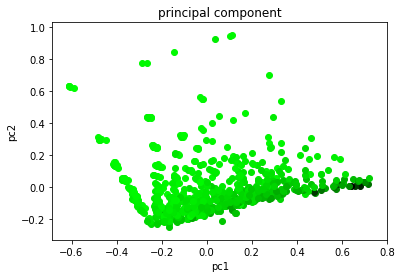

In [95]:
# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(U)
# 主成分をプロットする
for i in range(len(y.index)):
    plt.scatter(transformed[i, 0], transformed[i, 1], c=(0,1-float(y.iloc[i]),0))

plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の次元ごとの寄与率を出力する
print(pca.explained_variance_ratio_)

# グラフを表示する
plt.show()

In [90]:
pc1= pca.components_[0]
pc1

array([  2.779e-03,   5.804e-03,   1.243e-02,   6.225e-04,   1.258e-02,
         1.992e-02,   5.298e-03,  -1.164e-01,  -1.266e-02,   4.264e-02,
        -3.414e-01,   8.595e-01,   3.584e-01])

In [91]:
pc1_frame = pd.DataFrame(pc1.reshape((13,1)),index=['AMBULANCE', 'BICYCLE', 'BUS', 'FIRE TRUCK',
        'LARGE COM VEH(6 OR MORE TIRES)', 'LIVERY VEHICLE', 'MOTORCYCLE', 'PASSENGER VEHICLE', 'PICK-UP TRUCK',
        'SMALL COM VEH(4 TIRES) ', 'SPORT UTILITY / STATION WAGON', 'TAXI',
        'VAN'],columns=['values'])

In [92]:
pc1_frame

,values
AMBULANCE,0.002779
BICYCLE,0.005804
BUS,0.012429
FIRE TRUCK,0.000623
LARGE COM VEH(6 OR MORE TIRES),0.012576
LIVERY VEHICLE,0.019918
MOTORCYCLE,0.005298
PASSENGER VEHICLE,-0.116386
PICK-UP TRUCK,-0.012660
SMALL COM VEH(4 TIRES),0.042635


In [93]:
pc1_frame.sort_values(by='values')

,values
SPORT UTILITY / STATION WAGON,-0.341370
PASSENGER VEHICLE,-0.116386
PICK-UP TRUCK,-0.012660
FIRE TRUCK,0.000623
AMBULANCE,0.002779
MOTORCYCLE,0.005298
BICYCLE,0.005804
BUS,0.012429
LARGE COM VEH(6 OR MORE TIRES),0.012576
LIVERY VEHICLE,0.019918


In [94]:
pc2= pca.components_[1]
pc2_frame = pd.DataFrame(pc2.reshape((13,1)),index=['AMBULANCE', 'BICYCLE', 'BUS', 'FIRE TRUCK',
        'LARGE COM VEH(6 OR MORE TIRES)', 'LIVERY VEHICLE', 'MOTORCYCLE', 'PASSENGER VEHICLE', 'PICK-UP TRUCK',
        'SMALL COM VEH(4 TIRES) ', 'SPORT UTILITY / STATION WAGON', 'TAXI',
        'VAN'],columns=['values'])
pc2_frame.sort_values(by='values')

,values
VAN,-0.912165
SMALL COM VEH(4 TIRES),-0.031225
LARGE COM VEH(6 OR MORE TIRES),-0.012780
BUS,-0.007654
BICYCLE,-0.003841
LIVERY VEHICLE,-0.003102
AMBULANCE,-0.000547
FIRE TRUCK,-0.000323
MOTORCYCLE,0.003816
PICK-UP TRUCK,0.016382
